## The Sparks Foundation - Graduate Rotational Internship Program (TSF-GRIP) November 2023

# Task 6 : Iris Classification Using Decision Tree Algorithm

### By -  Divyabharathy Ramesh Nadar

.
### Objective - To Create a Decision Tree Classifier of provide iris dataset and Visualize it graphically.

In [4]:
#Importing Libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data Importing and Preprocessing

In [5]:
#Reading Data in pandas dataframe
df = pd.read_csv("Iris.csv", index_col=0)

In [6]:
#Checking the First Five Components of the Dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Checking the Shape of the Dataset
df.shape

(150, 5)

In [8]:
#Checking if there's any null value in the dataset
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
#Detailed info about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [10]:
# Checking for statistical information of the Dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Checking for unique values in the Target Label and their quantity
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [12]:
# Using Label Encoder to encode non numerric value into simple numbers
le_species = LabelEncoder()

In [13]:
# Creating a new Column which represent numeric value of non numeric columns
df["Num_Species"] = le_species.fit_transform(df["Species"])

In [17]:
#Again Checking the first five values in the Dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Num_Species
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [18]:
# Correlation table which shows the correlation between different
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Num_Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Num_Species,0.782561,-0.419446,0.949043,0.956464,1.000000


## Visualisation of Dataset

<Axes: >

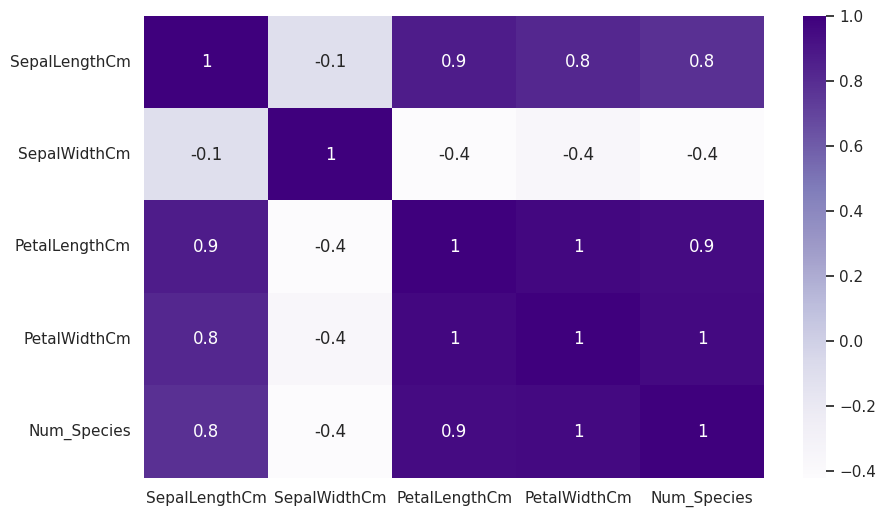

In [23]:
#Creating a Correlation heatmap for better understanding relationship between label and features
plt.figure(figsize=(10, 6))
sns.set_theme(style="white")
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="Purples", fmt=".1g")

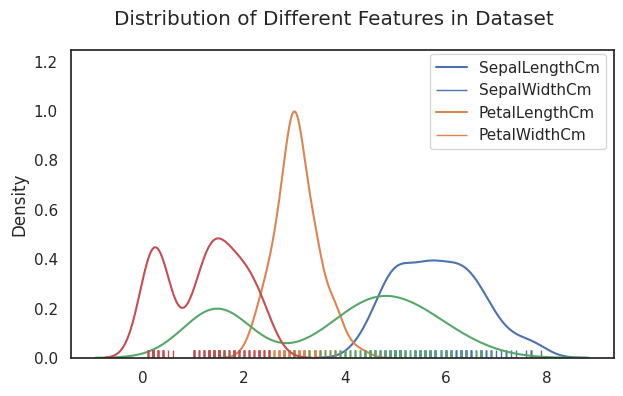

In [24]:
# Distrubution of different features used in dataset
fig, axes = plt.subplots(1, 1, figsize=(7, 4))

fig.suptitle("Distribution of Different Features in Dataset")

sns.distplot(df[['SepalLengthCm']], hist=False, rug=True)
sns.distplot(df[['SepalWidthCm']], hist=False, rug=True)
sns.distplot(df[['PetalLengthCm']], hist=False, rug=True)
sns.distplot(df[['PetalWidthCm']], hist=False, rug=True)

fig.legend(labels=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], bbox_to_anchor=(0.9, 0.75), loc="center right")

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

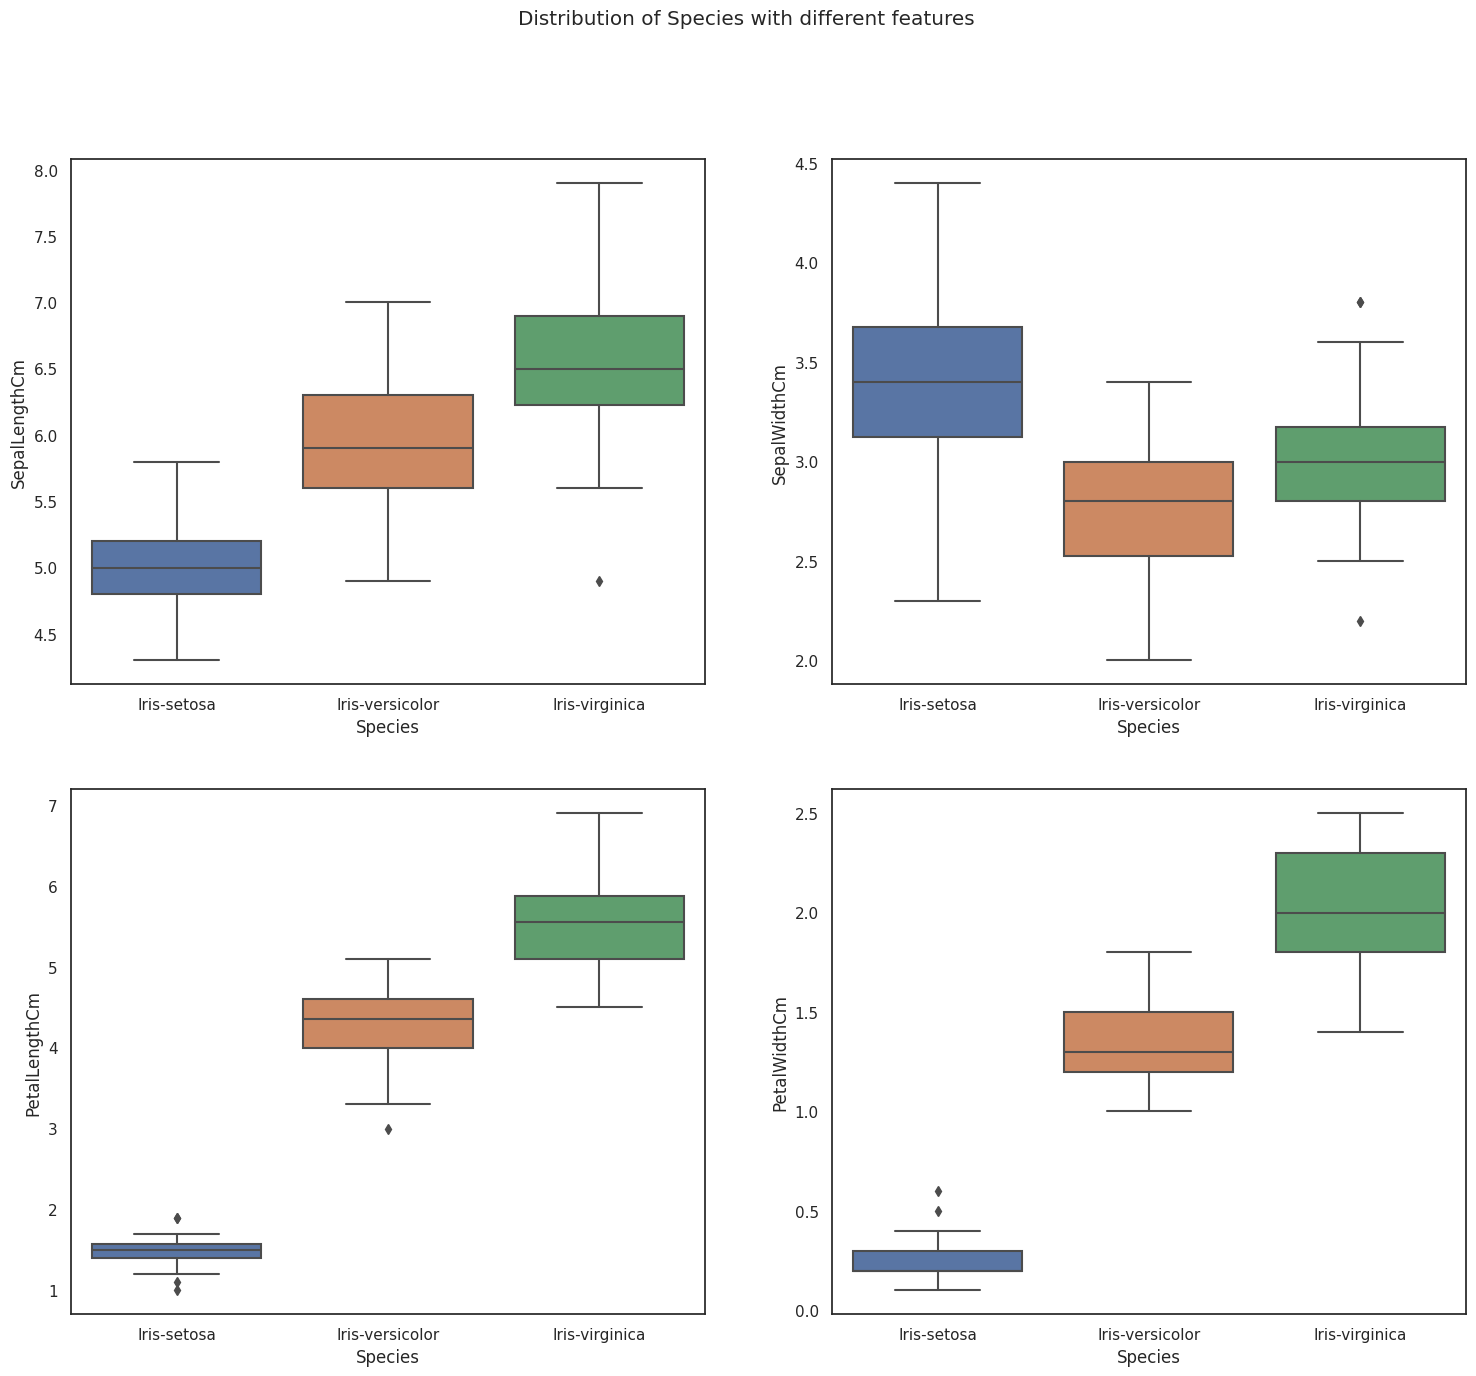

In [26]:
# Distribution of different Species with different Features
fig, axes = plt.subplots(2, 2, figsize=(18, 15))

fig.suptitle("Distribution of Species with different features")

sns.boxplot(ax=axes[0, 0], data=df, x=df.Species, y=df.SepalLengthCm)
sns.boxplot(ax=axes[0, 1], data=df, x=df.Species, y=df.SepalWidthCm)
sns.boxplot(ax=axes[1, 0], data=df, x=df.Species, y=df.PetalLengthCm)
sns.boxplot(ax=axes[1, 1], data=df, x=df.Species, y=df.PetalWidthCm)

## Splitting Data and Training Model

In [27]:
features = df.drop(["Species", "Num_Species"], axis=1)
target = df["Num_Species"]

In [28]:
model = tree.DecisionTreeClassifier(max_depth=5)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.1)

In [30]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

## Predicting the Model Performance and Checking Model Accuracy

In [31]:
y_pred = model.predict(x_test)

In [33]:
accuracy = accuracy_score(y_pred, y_test)

In [34]:
accuracy

1.0

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.665\nsamples = 135\nvalue = [46, 48, 41]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.497\nsamples = 89\nvalue = [0, 48, 41]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.174\nsamples = 52\nvalue = [0, 47, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.043\nsamples = 46\nvalue = [0, 45, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 45\nvalue = [0, 45, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

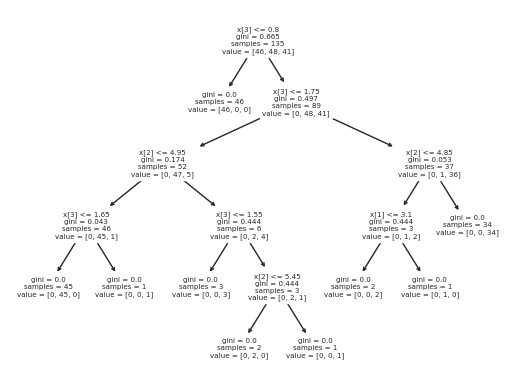

In [35]:
# Plot of our Decision Tree Model
tree.plot_tree(model)

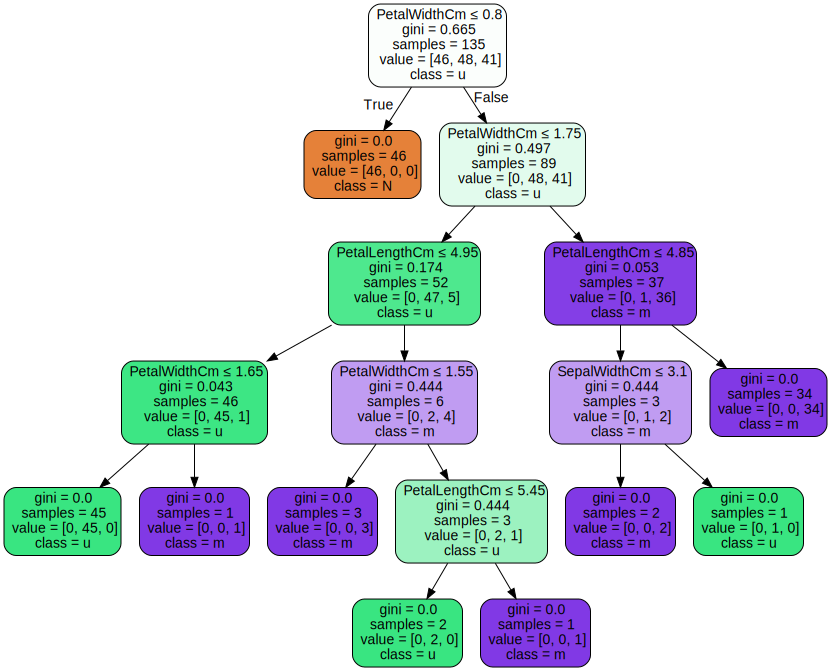

In [36]:
# Representation of model through graphviz
data = tree.export_graphviz(model, out_file=None,
                           feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
                           class_names="Num_Species",
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(data)
graph